<details><summary style="display:list-item; font-size:16px; color:blue;">Jupyter Help</summary>
    
Having trouble testing your work? Double-check that you have followed the steps below to write, run, save, and test your code!
    
[Click here for a walkthrough GIF of the steps below](https://static-assets.codecademy.com/Courses/ds-python/jupyter-help.gif)

Run all initial cells to import libraries and datasets. Then follow these steps for each question:
    
1. Add your solution to the cell with `## YOUR SOLUTION HERE ## `.
2. Run the cell by selecting the `Run` button or the `Shift`+`Enter` keys.
3. Save your work by selecting the `Save` button, the `command`+`s` keys (Mac), or `control`+`s` keys (Windows).
4. Select the `Test Work` button at the bottom left to test your work.

![Screenshot of the buttons at the top of a Jupyter Notebook. The Run and Save buttons are highlighted](https://static-assets.codecademy.com/Paths/ds-python/jupyter-buttons.png)

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
waste = pd.read_csv('waste.csv')
waste['income'] = waste['income'].astype('category').cat.set_categories(['Low', 'Lower Middle', 'Upper Middle', 'High'], ordered=True)

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 72

1. We have included the code to create a bar plot of Municipal Solid Waste (MSW) per capita for countries at four income levels. Add the following title and axis labels to the plot:
* the title as "Average Per Capita MSW Increases with Country Income Level"
* the x-axis label as "Average Municipal Solid Waste (MSW) \n(tons per year per person)" *Note:* `\n` will create a new line so the text is easier to read
* the y-axis as empty (given as "")

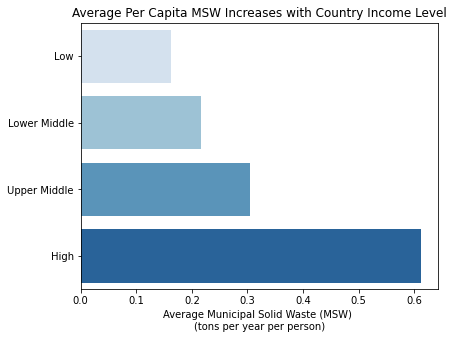

In [3]:
# plot
p = sns.barplot(data=waste, x='msw', y='income', ci=None, palette='Blues')
# labels
p.set(title="Average Per Capita MSW Increases with Country Income Level", 
      xlabel="Average Municipal Solid Waste (MSW) \n(tons per year per person)", 
      ylabel="")

plt.show()

2. Let's add annotations marking the specific averages for each income level at the end of each bar. To do this, the first step is to find the averages and round them to be more readable. The code to do this has been provided for you and saved as `mean_msw`. Print `mean_msw` to view the mean MSW for each income level.

In [4]:
# find the mean MSW for each income and round to 2 places
mean_msw = waste.groupby('income')['msw'].mean().round(2)

# print mean_msw
print(mean_msw)

income
Low             0.16
Lower Middle    0.22
Upper Middle    0.30
High            0.61
Name: msw, dtype: float64


3. Repeat the bar plot with title and labels from step 1. Add an annotation for each income level where:
* the `text` parameter is set to the mean MSW as a string
* the `xy` parameter places the text at an x value that is 0.01 more than the mean MSW and the y value corresponds to the position of the mean MSW in the list (i.e., "Low" is 0, "Lower Middle" is 1, etc.)
* the `weight` parameter is set to `'bold'`

*Note:* It's possible to add these annotations in four calls of `p.annotate()` or with one call using a for loop.

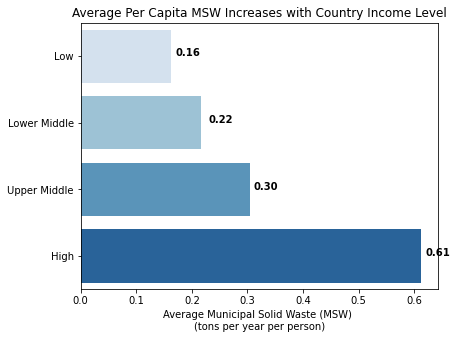

In [5]:
# plot
p = sns.barplot(data=waste, x='msw', y='income', ci=None, palette='Blues')

# labels
p.set(title='Average Per Capita MSW Increases with Country Income Level', 
      xlabel='Average Municipal Solid Waste (MSW) \n(tons per year per person)', 
      ylabel='')

# annotations
p.annotate(text="0.16", xy=(0.17,0), weight='bold')
p.annotate(text="0.22", xy=(0.23,1), weight='bold')
p.annotate(text="0.30", xy=(0.31,2), weight='bold')
p.annotate(text="0.61", xy=(0.62,3), weight='bold')

plt.show()

4. The annotation for the High income group runs past the border of the plot. There are a few ways we can fix this, but let's make a simple adjustment that removes the top and right borders. Repeat the plot from step 3 and add the following lines of code just before `plt.show()`:
```py
p.spines['top'].set_visible(False)
p.spines['right'].set_visible(False)
```

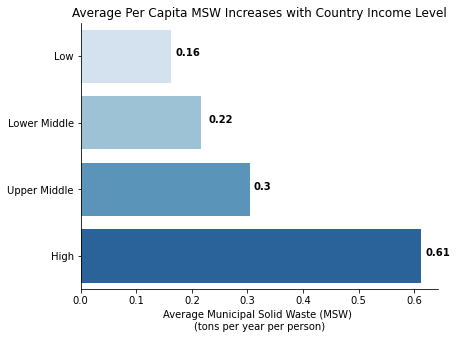

In [6]:
# plot
p = sns.barplot(data=waste, x='msw', y='income', ci=None, palette='Blues')

# labels
p.set(title='Average Per Capita MSW Increases with Country Income Level', 
      xlabel='Average Municipal Solid Waste (MSW) \n(tons per year per person)', 
      ylabel='')

# annotations
for i,msw in enumerate(mean_msw):
    p.annotate(text=str(msw), xy=(msw+0.01,i), weight='bold')

# remove top and right borders
p.spines['top'].set_visible(False)
p.spines['right'].set_visible(False)

plt.show()